# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = soup(browser.html, 'html.parser')

In [5]:
# Extract all rows of data
rows = soup.find_all('tr')
cols = [th.text for th in rows[0].find_all('th')]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
# Loop through the scraped data to create a list of rows
data = [[td.text for td in row.find_all('td')] for row in rows[1:]]

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mtd = pd.DataFrame(data, columns=cols)

In [8]:
# Confirm DataFrame was created successfully
mtd.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis
convert = {
    'id': int,
    'terrestrial_date': 'datetime64[ns]',
    'sol': int,
    'ls': int,
    'month': int,
    'min_temp': float,
    'pressure': float
}
mtd = mtd.astype(convert)

In [11]:
# Confirm type changes were successful by examining data types again
mtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
len(mtd['month'].unique())

12

In [13]:
# 2. How many Martian days' worth of data are there?
len(mtd['sol'].unique())

1867

In [14]:
# 3. What is the average low temperature by month?
avg_low_by_month = mtd.groupby('month')['min_temp'].mean()
avg_low_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

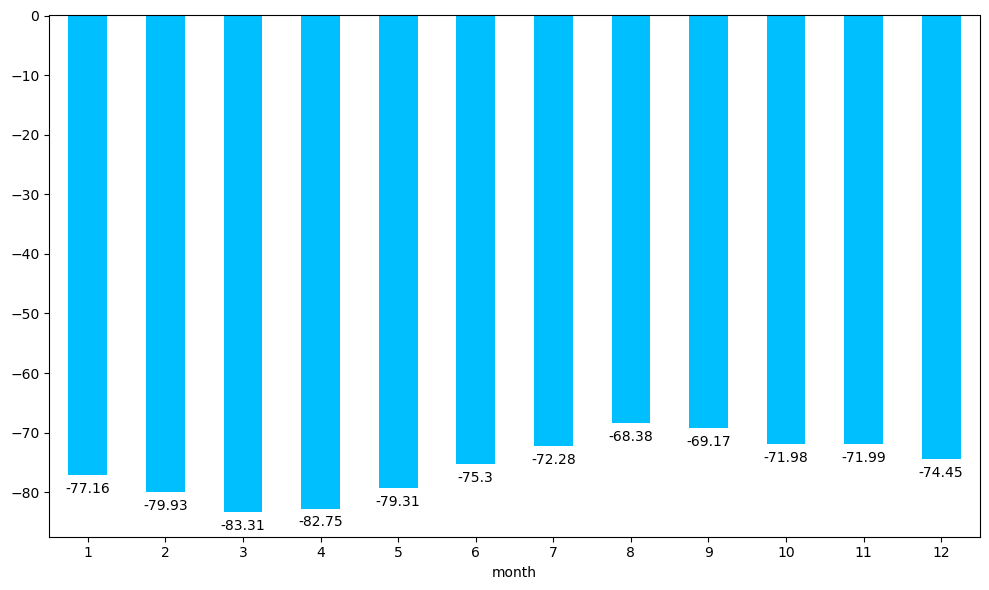

In [15]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
avg_low_by_month.plot(kind='bar', color='deepskyblue')
for i, v in enumerate(avg_low_by_month):
    plt.text(i, v - 3.5, str(round(v, 2)), ha='center', va='bottom')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location
min_max =pd.DataFrame({
    'Coldest Month': [avg_low_by_month.idxmin()],
    'Hottest Month': [avg_low_by_month.idxmax()]
}).style.hide()
min_max

Coldest Month,Hottest Month
3,8


In [17]:
# 4. Average pressure by Martian month
avg_pressure_by_month = mtd.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

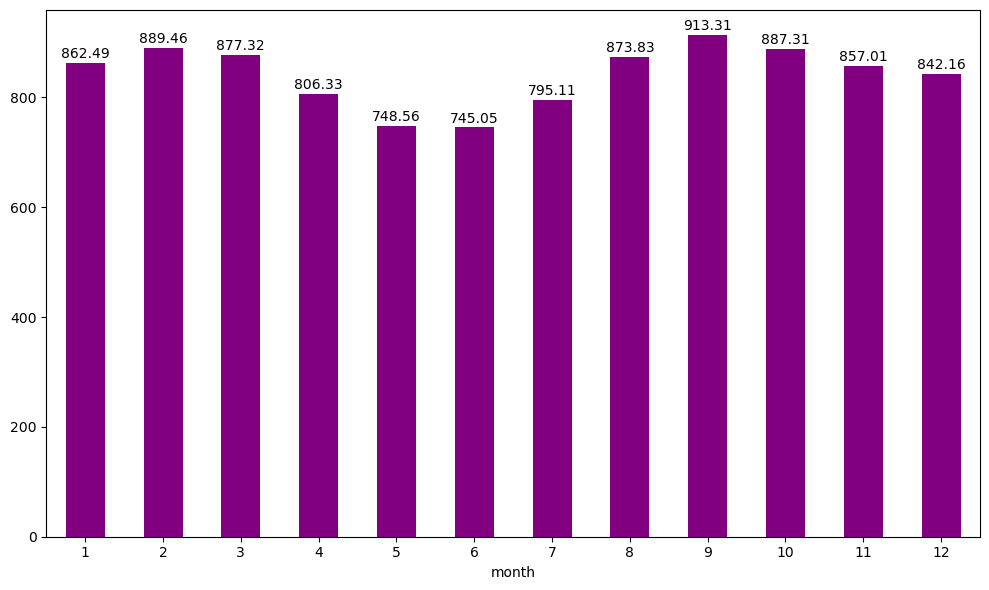

In [18]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='purple')
for i, v in enumerate(avg_pressure_by_month):
    plt.text(i, v + 3.5, str(round(v, 2)), ha='center', va='bottom')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?

'''
There are 360 degrees in a full rotation. 
For the sun to be at the same angle that must mean a full year has passed
    (as long as it has been more than 5 days since the measurements.)
    (arbitraily larger than the max number of consecutive repeated ls measurments)
Taking the difference in terrestrial days when this occurs for each angle
    gives us a good average for number of earth days in a mars year
'''

diffs = []
for ls in range(360):
    q = mtd.query('ls == @ls').index
    if len(q) >= 2:
        start = mtd.iloc[q[0]]
        second = mtd.iloc[q[1]]
        diff = second['terrestrial_date'] - start['terrestrial_date']
        i=1
        while diff.days < 5 and (1 + i) < len(q):
            second = mtd.iloc[q[1+i]]
            i+=1
            diff = second['terrestrial_date'] - start['terrestrial_date']
        if diff.days > 700: print(f'ls:{ls} has too sporadic of data')
        elif diff.days > 5:
            diffs.append(diff.days)
        else: print(f'ls:{ls} does not have enough data (two points are not far enough away)')
    else: print(f'ls:{ls} does not have enough data (one point is not enough)')
estimate = int(round((sum(diffs)/len(diffs)),0))
print(f'\nBased on the ls data there should be {estimate} earth days in a mars year')

ls:275 does not have enough data (one point is not enough)
ls:276 does not have enough data (two points are not far enough away)
ls:277 does not have enough data (two points are not far enough away)
ls:278 does not have enough data (one point is not enough)
ls:279 does not have enough data (two points are not far enough away)
ls:315 has too sporadic of data
ls:325 has too sporadic of data
ls:326 has too sporadic of data

Based on the ls data there should be 687 earth days in a mars year


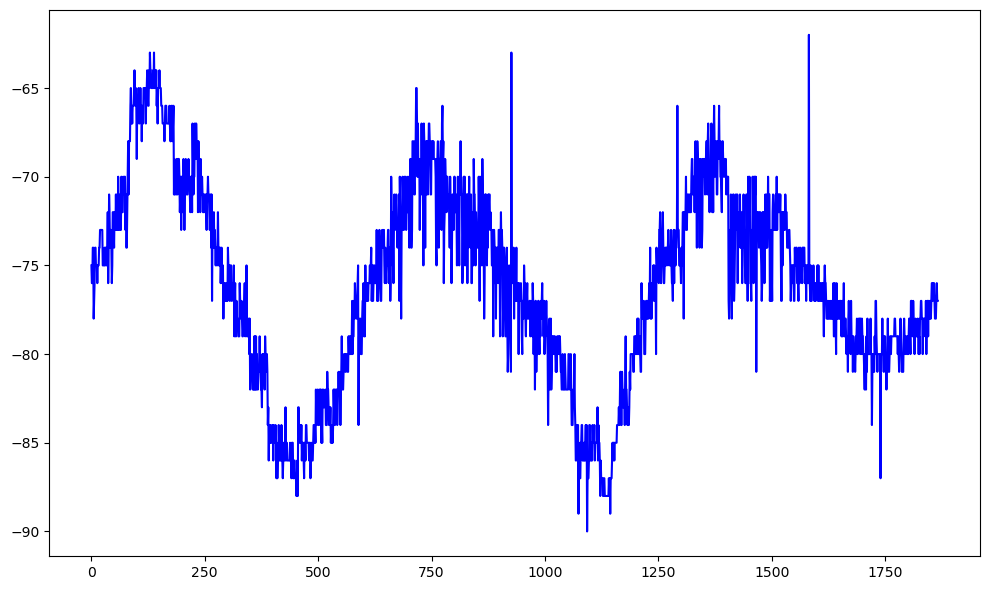

In [20]:
plt.figure(figsize=(10, 6))
mtd['min_temp'].plot(kind='line', color='blue')
plt.tight_layout()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Based on the ls data there should be 687 earth days in a mars year. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mtd.to_csv('mars_temperature_data.csv')

In [22]:
browser.quit()